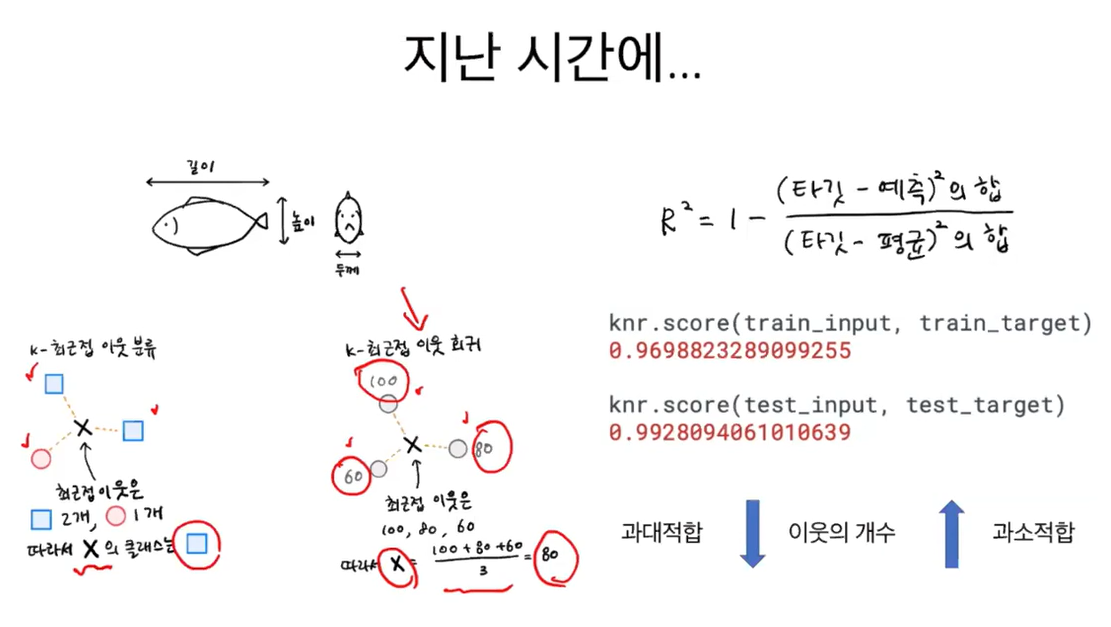

- 이웃 수를 낮춤 -> 과대적합 (복잡도가 높음)
- 이웃 수를 높임 -> 과소적합 (복잡도가 낮음)

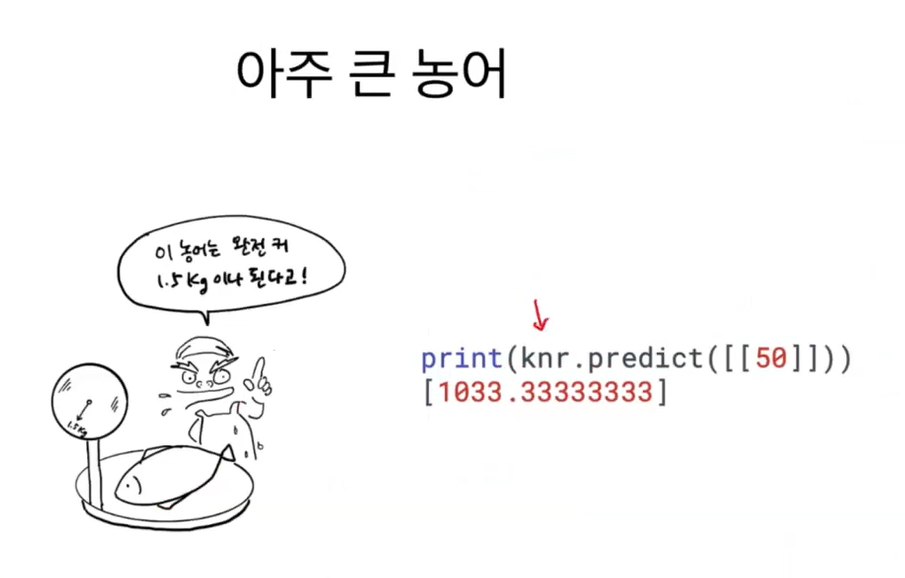

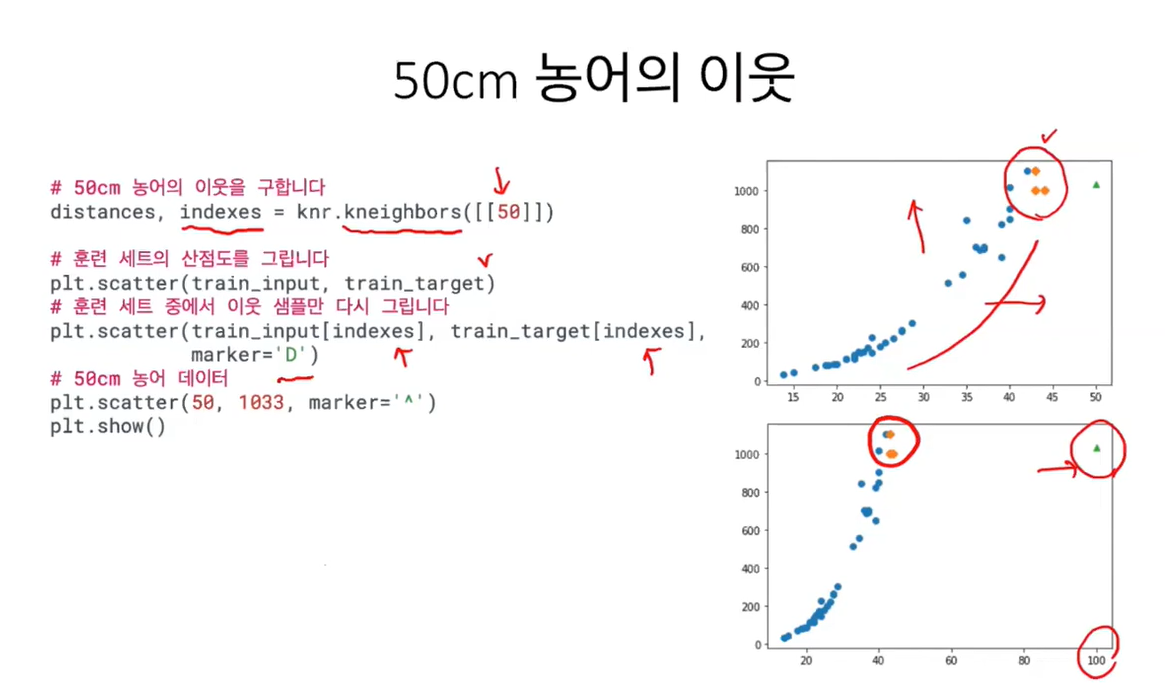

- 아무리 먼 곳에 있는 값이라도 가까운 것으로 계산하기 때문에 정확도가 낮을 수 있음
- 범위 안에서 해야 모델의 성능이 좋아짐

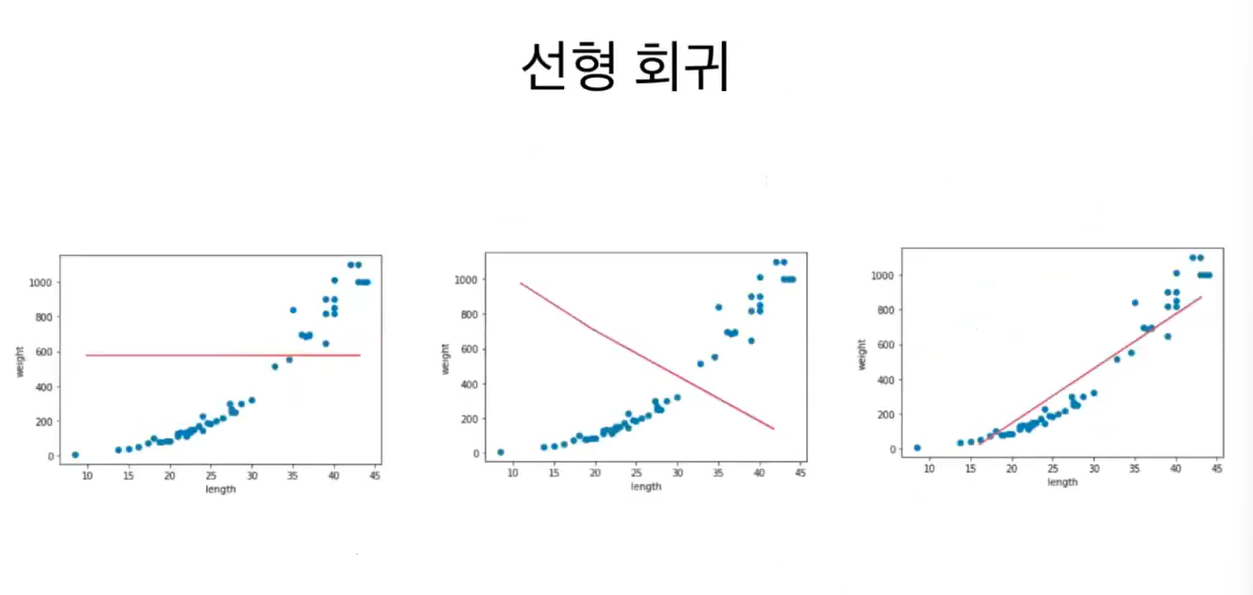

- linear regression
  - 로지스틱 회귀
  - 신경망
  - 직선의 방정식

In [ ]:
import numpy as np


perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿈

In [ ]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [ ]:
test_input

array([ 8.4, 18. , 27.5, 21.3, 22.5, 40. , 30. , 24.6, 39. , 21. , 43.5,
       16.2, 28. , 27.3])

In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input)
print(test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [ ]:
train_input.shape

(42, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련함
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

[1033.33333333]


- 문제가 있는 것을 볼 수 있음

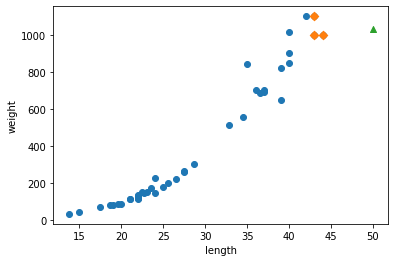

In [ ]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
print(knr.predict([[100]])) # 50이랑 똑같은 결과가 나옴

[1033.33333333]


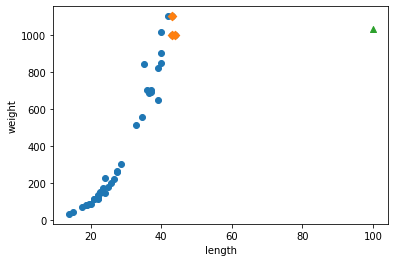

In [ ]:
# 100cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 데이터와 가장 가까운 3개의 값의 평균이 1033이기 때문에 예측값도 1033으로 나오는 것을 확인할 수 있음

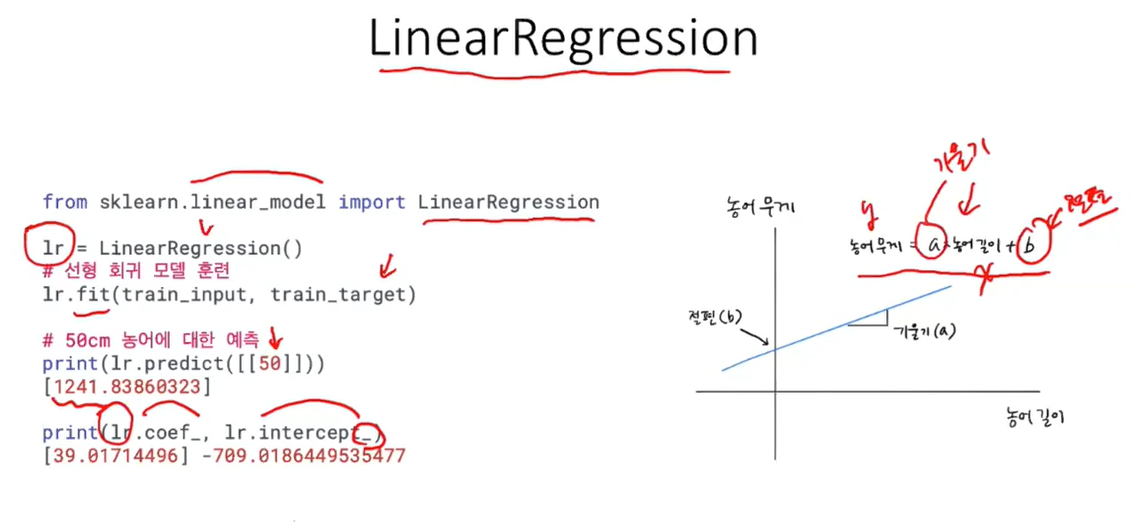

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_) # 기울기와 절편 값

[1241.83860323]
[39.01714496] -709.0186449535477


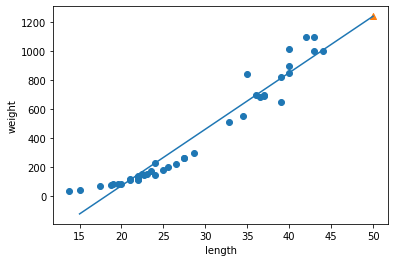

In [ ]:
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그림
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.939846333997604
0.8247503123313558


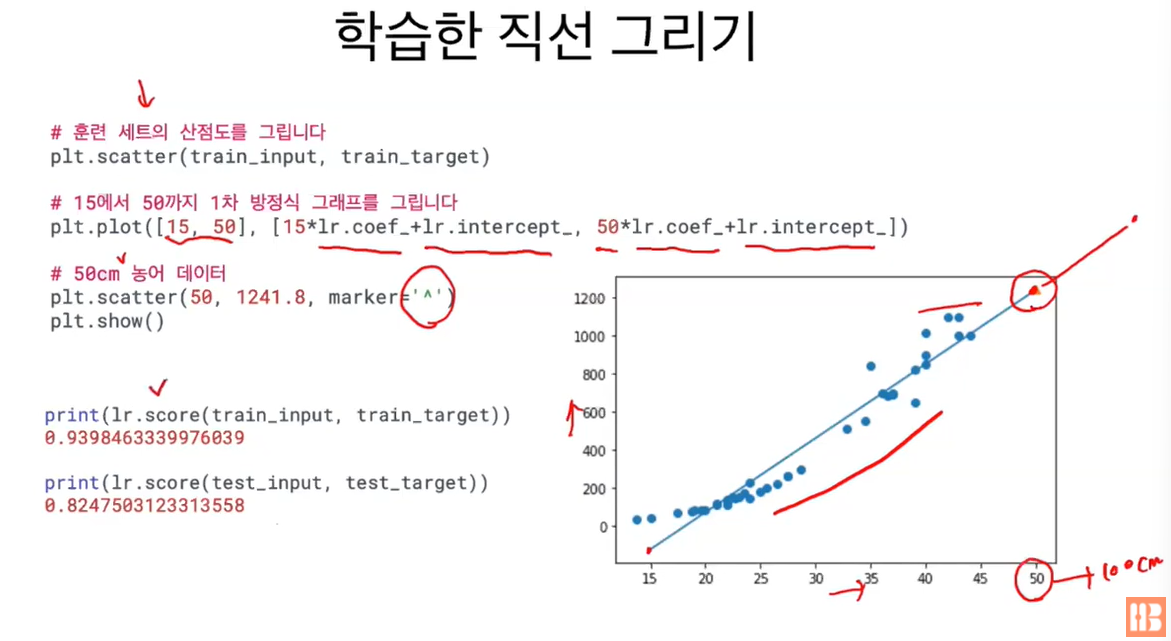

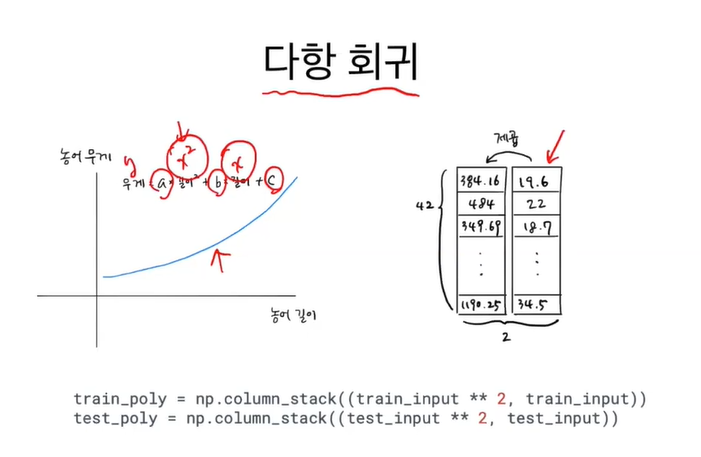

- 제곱 연산자를 통하여 제곱 형태로 만듦
- column_stack을 만듦

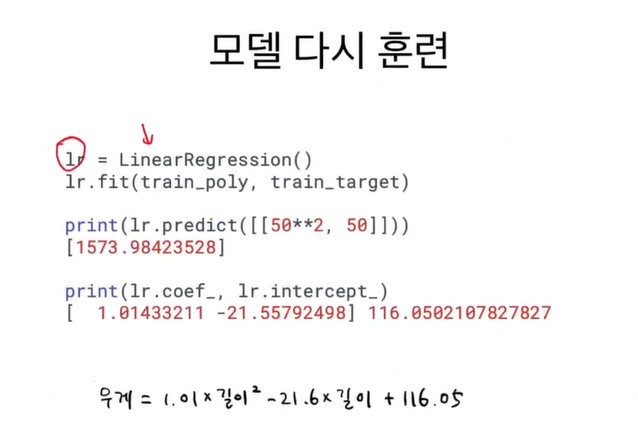

- 두개의 input을 넣어야함
  - 제곱 형태 한 개, 일차항 한 개

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


- 2차 함수 꼴로 나오는 것을 확인

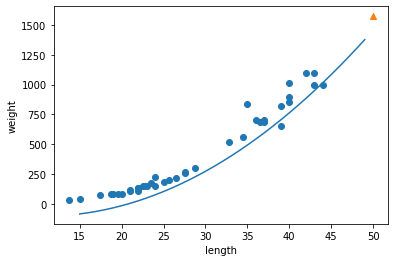

In [ ]:
import matplotlib.pyplot as plt

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듦
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그림
plt.plot(point, 1.01*point**2 -21.6*point + 11.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))

print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
